# Introduction
We'll work with a dataset of college majors and their post-graduate employment information. We'll explore the data with the pandas plotting functionality in Jupyter.

### Goals
We might explore some questions like:
- Do students in more popular majors make more money?
   - Using scatter plots
- How many majors are predominantly male? Predominantly female?
   - Using histograms
- Which category of majors have the most students?
   - Using bar plots

### Given: Data Set
The dataset was originally compiled by the American Community Survey, and Github user FiveThirtyEight cleaned it and released it to their [Github](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Here are the column names and descriptions:

|Header|Description|
|:-----|:----|
|`Rank`|Rank by median earnings |
|`Major_code`|Major code, FO1DP in ACS PUMS|
|`Major`|Major description|
|`Major_category`|Category of major from Carnevale et al|
|`Total`|Total number of people with major|
|`Sample_size`|Sample size (unweighted) of full-time, year-round ONLY (used for earnings)|
|`Men`|Male graduates|
|`Women`|Female graduates|
|`ShareWomen`|Women as share of total|
|`Employed`|Number employed (ESR == 1 or 2)|
|`Full_time`|Employed 35 hours or more|
|`Part_time`|Employed less than 35 hours|
|`Full_time_year_round`|Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)|
|`Unemployed`|Number unemployed (ESR == 3)|
|`Unemployment_rate`|Unemployed / (Unemployed + Employed)|
|`Median`|Median earnings of full-time, year-round workers|
|`P25th`|25th percentile of earnings|
|`P75th`|75th percentile of earnings|
|`College_jobs`|Number with job requiring a college degree|
|`Non_college_jobs`|Number with job not requiring a college degree|
|`Low_wage_jobs`|Number in low-wage service jobs|

--------
## Step 1: Open the dataset

We'll open our data set now and make it ready to be used for analysis.

In [1]:
#global imports
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
recent_grads=pd.read_csv("recent-grads.csv")
print(recent_grads.iloc[0])
recent_grads.head()

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


----------------
## Step 2: Explore the data
Let's print out a few lines of the datasets to see what they look like:

In [2]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


We'll delete any rows with missing values.

In [3]:
raw_data_count=recent_grads.count()[0]
recent_grads=recent_grads.dropna()
cleaned_data_count=recent_grads.count()[0]

print(raw_data_count)
print(cleaned_data_count)

173
172


----------------
## Step 3: Plot data we're interested in
Let's explore some questions, like:
- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?
- Is there any link between the number of full-time employees and median salary?


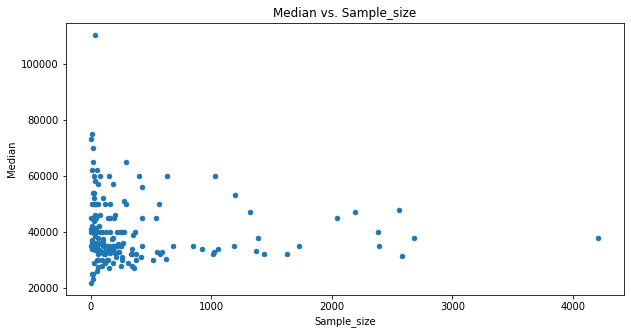

In [4]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median vs. Sample_size', figsize=(10,5))

> Do students in more popular majors make more money?

It would seem that majors with fewer graduates make more money. The range for low-student majors varies from a little over \\$20k to over \\$100k, however, due to the large number of low-student majors. As major sizes grow, salaries seem to hover between \\$60k and \\$30k.

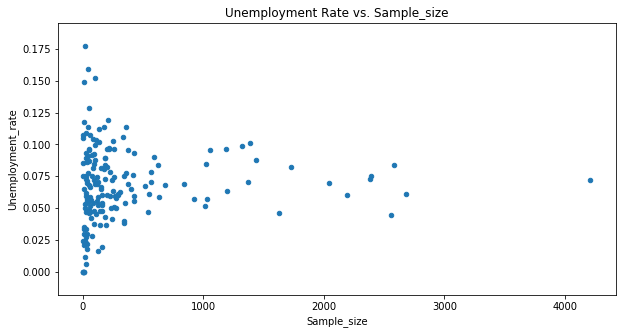

In [5]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Unemployment Rate vs. Sample_size', figsize=(10,5))

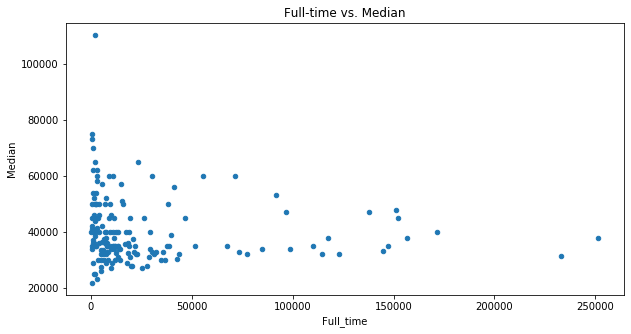

In [6]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Full-time vs. Median', figsize=(10,5))

> Is there any link between the number of full-time employees and median salary?

It would seem the trend here is very similar to the trend between number of students in the major vs median salary. Essentially, there is a massive range in salary for those who are working full-time, and many post-graduate students working full-time have a salary between \\$35k and \\$42k.

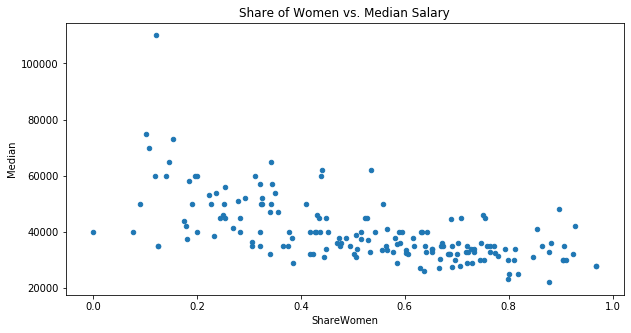

In [7]:
recent_grads.plot(x='ShareWomen', y='Median', kind='scatter', title='Share of Women vs. Median Salary', figsize=(10,5))

> Do students that majored in subjects that were majority female make more money?

In majors where the majority of share of students were women, salaries are skewed towards the range of \\$65k to a little over \\$20k. In majors were women didn't comprise the majority, the range was much bigger, from \\$30k to over \\$100k.

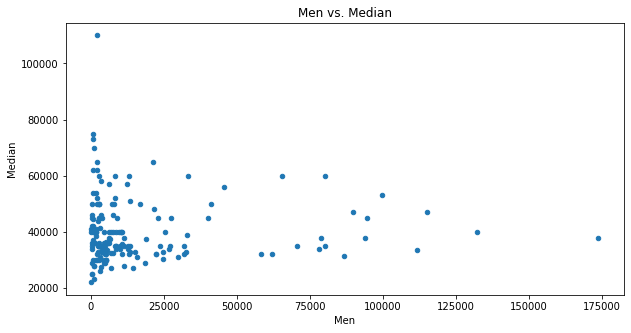

In [8]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Men vs. Median', figsize=(10,5))

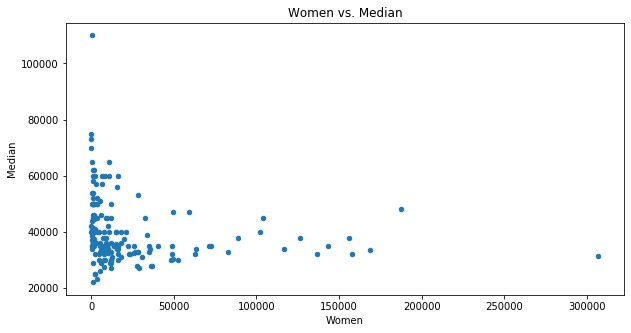

In [9]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Women vs. Median', figsize=(10,5))

Let's keep going! To figure out the distribution of values for each column, we'll use a histogram plot.

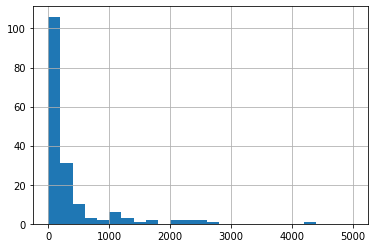

In [10]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

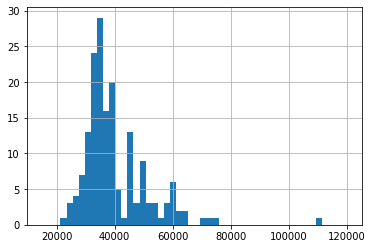

In [11]:
recent_grads['Median'].hist(bins=50, range=(15000, 120000))

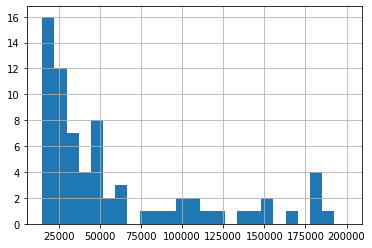

In [12]:
recent_grads['Employed'].hist(bins=25, range=(15000, 200000))

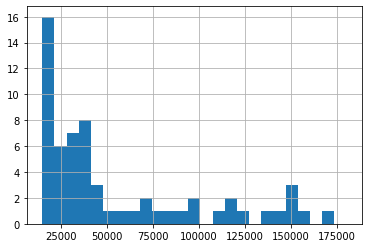

In [13]:
recent_grads['Full_time'].hist(bins=25, range=(15000, 180000))

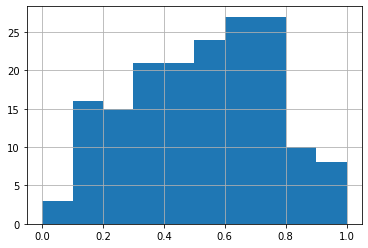

In [14]:
recent_grads['ShareWomen'].hist(bins=10, range=(0,1))

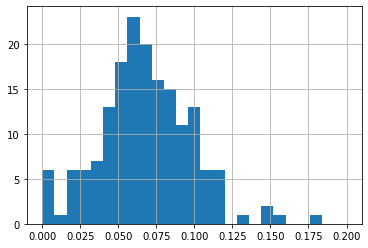

In [15]:
recent_grads['Unemployment_rate'].hist(bins=25, range=(0,.2))

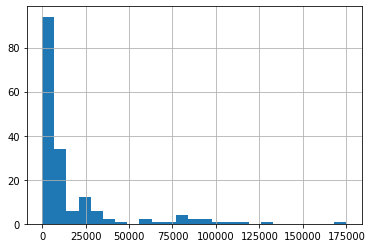

In [16]:
recent_grads['Men'].hist(bins=25, range=(0,175000))

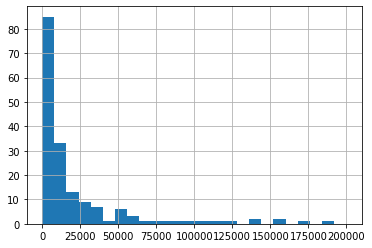

In [17]:
recent_grads['Women'].hist(bins=25, range=(0,200000))

Next, let's explore the relationships in the data using a scatter matrix plot. A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119660110>,
      dtype=object)

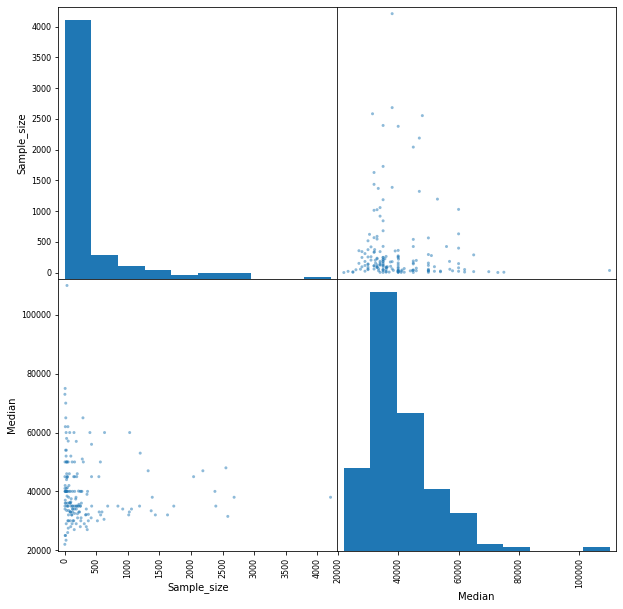

In [18]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119817a50>,
      dtype=object)

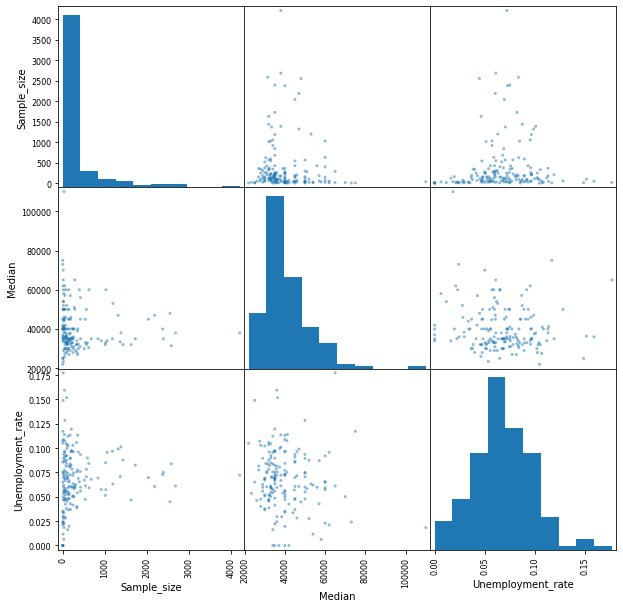

In [19]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

Comparison of percents in share of women (First ten rows/Last ten rows)

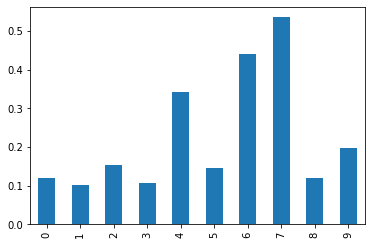

In [25]:
recent_grads.head(10)['ShareWomen'].plot(kind='bar')

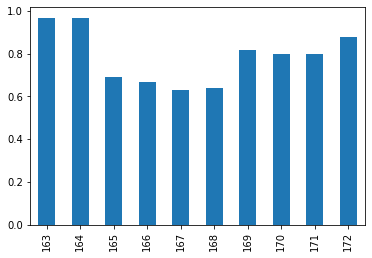

In [26]:
recent_grads.tail(10)['ShareWomen'].plot(kind='bar')

Comparison of unemployment rates (First ten rows/Last ten rows)

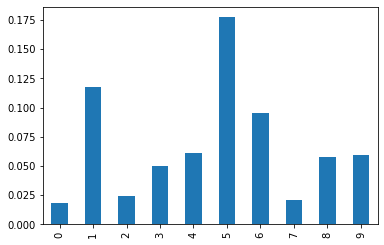

In [27]:
recent_grads.head(10)['Unemployment_rate'].plot(kind='bar')

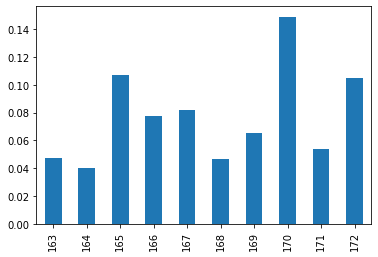

In [28]:
recent_grads.tail(10)['Unemployment_rate'].plot(kind='bar')

----------------
## Step 4: Next Steps
Our analysis only skimmed the surface of what problems we could find answers for in this dataset using visual analysis tools.

Here are some interesting questions that we can come back to solve:
- Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
- Use a box plot to explore the distributions of median salaries and unemployment rate.
- Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.